# Lasso (L1) Regression
<br><br>
Lasso regression goes even further than Ridge regression by actually promoting sparsity as opposed to simply reducing overfitting. Lasso regression will make some of the weights close to or equal to zero. In the figure below from Elements of Statistical Learning by Hastie, Tibshirani, and Friedman, l1 regression is on the left hand side. As the optimization relaxes the objective function (the red ovals), the objective function is more likely to intersect the contraints (the diamond) at the 'pointy ends' which means that one of the features is equal to 0. 

![l1 and l1 regularization](l2-l1-regularization.png)


Lasso 'Regularization' is accomplished by using MAP estimation with a Laplacian prior. I.e.<br><br>
$$P(w) = Lap(w|\lambda)\\
= \prod_{j=1}^{D} Lap(w_j|0, \frac{1}{\lambda})\\
= \prod_{j=1}^{D} \frac{\lambda}{2}e^{-\lambda|w_j|}
$$ 
<br><br>
Therefore, for Lasso Regression we have the following optimization/objective.
<br><br>
$$\theta_{Lasso} = \quad \underset{w}{\mathrm{argmax}}\quad log(P(Y|x,w)P(w))\\
= \underset{\theta}{\mathrm{argmin}}\quad - \sum_{i=1}^{N} log[\frac{1}{\sqrt{2\pi\sigma^2}}exp(\frac{-(y_i - w^Tx_i)^2}{2\sigma^2})] - \sum_{j=1}^{D}log[\frac{\lambda}{2}e^{-\lambda|w_j|}]
$$
<br><br> 
If you do the below you will arrive the expression:
<br>
* multiply by $2\sigma^2$ 
* carry on with the algebra (see the linear regression notebook for more details)
* drop constants since they do NOT affect the minimization 
* minimize the objective, i.e. take the partial derivative w.r.t. w and set = 0
<br><br>
$$\theta_{Lasso} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + w^Tx_i))^2 + \lambda||w||_{1}\\
= \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + w^Tx_i))^2 + Sparsity \space Penalty
$$
<br>
where $\lambda = \frac{\sigma^2}{\tau^2} and \lambda\geq0$.

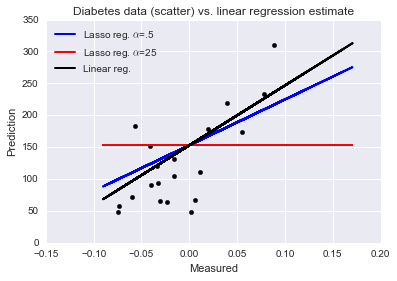

In [3]:
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Train the model using the training set
model = linear_model.Lasso(alpha=.5)
model.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the training set.
diabetes_pred_lasso = model.predict(diabetes_X_train)
# Repeat the training with a higher alpha for illustration purposes
model = linear_model.Lasso(alpha=25)
model.fit(diabetes_X_train, diabetes_y_train)
diabetes_pred_lasso_high = model.predict(diabetes_X_train)

# Do the linear regression for comparison only
lr = linear_model.LinearRegression()
lr.fit(diabetes_X_train, diabetes_y_train)
diabetes_pred_lr = lr.predict(diabetes_X_train)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_train, diabetes_pred_lasso, color='blue', linewidth=2, label=r"Lasso reg. $\alpha$=.5")
plt.plot(diabetes_X_train, diabetes_pred_lasso_high, color='red', linewidth=2, label=r"Lasso reg. $\alpha$=25")
plt.plot(diabetes_X_train, diabetes_pred_lr, color='black', linewidth=2, label="Linear reg.")
plt.xlabel("Measured")
plt.ylabel("Prediction")
plt.title("Diabetes data (scatter) vs. linear regression estimate")
plt.legend(loc="best")
plt.show()

<br><br>
# Take away
<br>
Ultimately the 'Sparsity Penalty' will reduce certain weights to zero or close to zero. In the example above much like in l2 regularization, lasso 'flattens' the linear regression line and when $\alpha$ = 25 all weights are 0 so that the line is completely flat.